In [1]:
import sys
sys.path.append('/sbnd/app/users/brindenc/mypython') #My utils path
from bc_utils.CAFana import pic as CAFpic
from bc_utils.CAFana import plotters as CAFplotters
from bc_utils.utils import pic,plotters
from time import time
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
from datetime import date

%load_ext autoreload
%autoreload 2

plt.style.use(['science','no-latex'])
day = date.today().strftime("%Y_%m_%d")

#Params import
import nuecc

In [4]:
0.511*0.3/(np.sqrt(1-0.3**2)),0.511*0.3

(0.16070206546947005, 0.1533)

In [2]:
np.arange(0,0.01,0.001)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

In [2]:
#Constants/parameters
pot1 = nuecc.pot1
pot2 = 1e19
SEED = nuecc.SEED
n = nuecc.n #number of random universes
ntrk = 50 #Size of shower confusion matrix
nshw = 50 #Size of track confusion matrix
E_threshold = 0.021 #GeV energy threshold for visible hadron (ArgoNeut)
E_threshold_exotic = E_threshold #Set same for now
DATA_DIR = nuecc.DATA_DIR
suffix = '_full'
#suffix = ''
xls=16
tls=20
lls=16

In [3]:
#Get data
nue_reco_cuts = pd.read_csv(f'{DATA_DIR}reco_cuts_nue{suffix}.csv')
nuecc_reco_cuts = pd.read_csv(f'{DATA_DIR}reco_cuts_nuecc{suffix}.csv')
nue_truth_cuts = pd.read_csv(f'{DATA_DIR}truth_cuts_nue{suffix}.csv')
nuecc_truth_cuts = pd.read_csv(f'{DATA_DIR}truth_cuts_nuecc{suffix}.csv')

shwconfusion_nue = genfromtxt(f'{DATA_DIR}shwconfusion_n0_nue{suffix}.csv',delimiter=',')
shwconfusion_nuecc = genfromtxt(f'{DATA_DIR}shwconfusion_n0_nuecc{suffix}.csv',delimiter=',')
trkconfusion_nue = genfromtxt(f'{DATA_DIR}trkconfusion_n0_nue{suffix}.csv',delimiter=',')
trkconfusion_nuecc = genfromtxt(f'{DATA_DIR}trkconfusion_n0_nuecc{suffix}.csv',delimiter=',')

shwconfusion_nue_cut1 = genfromtxt(f'{DATA_DIR}shwconfusion_n0_cut1nue{suffix}.csv',delimiter=',')
shwconfusion_nuecc_cut1 = genfromtxt(f'{DATA_DIR}shwconfusion_n0_cut1nuecc{suffix}.csv',delimiter=',')
trkconfusion_nue_cut1 = genfromtxt(f'{DATA_DIR}trkconfusion_n0_cut1nue{suffix}.csv',delimiter=',')
trkconfusion_nuecc_cut1 = genfromtxt(f'{DATA_DIR}trkconfusion_n0_cut1nuecc{suffix}.csv',delimiter=',')

shwconfusion_nue_mean = genfromtxt(f'{DATA_DIR}shwconfusion_mean_nue{suffix}.csv',delimiter=',')
shwconfusion_nuecc_mean = genfromtxt(f'{DATA_DIR}shwconfusion_mean_nuecc{suffix}.csv',delimiter=',')
trkconfusion_nue_mean = genfromtxt(f'{DATA_DIR}trkconfusion_mean_nue{suffix}.csv',delimiter=',')
trkconfusion_nuecc_mean = genfromtxt(f'{DATA_DIR}trkconfusion_mean_nuecc{suffix}.csv',delimiter=',')

In [4]:
#Track plots
plt.figure(figsize=(7,6))
ax = sns.heatmap(trkconfusion_nue[:5,:5]/np.sum(trkconfusion_nue[:5,:5]),annot=True,linewidths=.5,fmt='.2%')
ax.set_xlabel('Truth',fontsize=xls)
ax.set_ylabel('Reco',fontsize=xls)
ax.set_title(r'$\nu+e$ Track Precuts',fontsize=tls)
plotters.save_plot(f'nue_trk_confusion')
plt.close()

plt.figure(figsize=(7,6))
ax = sns.heatmap(trkconfusion_nuecc[:5,:5]/np.sum(trkconfusion_nuecc[:5,:5]),annot=True,linewidths=.5,fmt='.2%')
ax.set_xlabel('Truth',fontsize=xls)
ax.set_ylabel('Reco',fontsize=xls)
ax.set_title(r'$\nu_e$ Track Precuts',fontsize=tls)
plotters.save_plot(f'nuecc_trk_confusion')
plt.close()

plt.figure(figsize=(7,6))
ax = sns.heatmap(trkconfusion_nue_cut1[:5,:5]/np.sum(trkconfusion_nue_cut1[:5,:5]),annot=True,linewidths=.5,fmt='.2%')
ax.set_xlabel('Truth',fontsize=xls)
ax.set_ylabel('Reco',fontsize=xls)
ax.set_title(r'$\nu+e$ Track Postcuts $E_e\theta_e^2 < 0.003$ [GeV rad$^2$]',fontsize=tls-2)
plotters.save_plot(f'nue_trk_confusion_cut1')
plt.close()

plt.figure(figsize=(7,6))
ax = sns.heatmap(trkconfusion_nuecc_cut1[:5,:5]/np.sum(trkconfusion_nuecc_cut1[:5,:5]),annot=True,linewidths=.5,fmt='.2%')
ax.set_xlabel('Truth',fontsize=xls)
ax.set_ylabel('Reco',fontsize=xls)
ax.set_title(r'$\nu_e$ Track Postcuts $E_e\theta_e^2 < 0.003$ [GeV rad$^2$]',fontsize=tls-2)
plotters.save_plot(f'nuecc_trk_confusion_cut1')
plt.close()

In [5]:
#Shower plots
plt.figure(figsize=(7,6))
ax = sns.heatmap(shwconfusion_nue[:5,:5]/np.sum(shwconfusion_nue[:5,:5]),annot=True,linewidths=.5,fmt='.2%')
ax.set_xlabel('Truth',fontsize=xls)
ax.set_ylabel('Reco',fontsize=xls)
ax.set_title(r'$\nu+e$ Shower Precuts',fontsize=tls)
plotters.save_plot(f'nue_shw_confusion')
plt.close()

plt.figure(figsize=(7,6))
ax = sns.heatmap(shwconfusion_nuecc[:5,:5]/np.sum(shwconfusion_nuecc[:5,:5]),annot=True,linewidths=.5,fmt='.2%')
ax.set_xlabel('Truth',fontsize=xls)
ax.set_ylabel('Reco',fontsize=xls)
ax.set_title(r'$\nu_e$ Shower Precuts',fontsize=tls)
plotters.save_plot(f'nuecc_shw_confusion')
plt.close()

plt.figure(figsize=(7,6))
ax = sns.heatmap(shwconfusion_nue_cut1[:5,:5]/np.sum(shwconfusion_nue_cut1[:5,:5]),annot=True,linewidths=.5,fmt='.2%')
ax.set_xlabel('Truth',fontsize=xls)
ax.set_ylabel('Reco',fontsize=xls)
ax.set_title(r'$\nu+e$ Shower Postcuts $E_e\theta_e^2 < 0.003$ [GeV rad$^2$]',fontsize=tls-2)
plotters.save_plot(f'nue_shw_confusion_cut1')
plt.close()

plt.figure(figsize=(7,6))
ax = sns.heatmap(shwconfusion_nuecc[:5,:5]/np.sum(shwconfusion_nuecc[:5,:5]),annot=True,linewidths=.5,fmt='.2%')
ax.set_xlabel('Truth',fontsize=xls)
ax.set_ylabel('Reco',fontsize=xls)
ax.set_title(r'$\nu_e$ Shower Postcuts $E_e\theta_e^2 < 0.003$ [GeV rad$^2$]',fontsize=tls-2)
plotters.save_plot(f'nuecc_shw_confusion_cut1')
plt.close()

In [23]:
#Get keys from params
nreco_keys = nuecc.nreco_keys
shw_keys = nuecc.shw_keys
mcnu_keys = nuecc.mcnu_keys
mcprim_keys = nuecc.mcprim_keys

In [24]:
#nu + e
nue_tree1 = uproot.open(f'{DATA_DIR}CAFnue1{suffix}.root:recTree;1')

nue_mc = CAFpic.get_df(nue_tree1,mcnu_keys)
nue_mcprim = CAFpic.get_df(nue_tree1,mcprim_keys)
nue_nreco = CAFpic.get_df(nue_tree1,nreco_keys) #Make seperate tree to count reco objects
nue_shw = CAFpic.get_df(nue_tree1,shw_keys)

#nuecc
nuecc_tree1 = uproot.open(f'{DATA_DIR}CAFnuecc1{suffix}.root:recTree;1')

nuecc_mc = CAFpic.get_df(nuecc_tree1,mcnu_keys)
nuecc_mcprim = CAFpic.get_df(nuecc_tree1,mcprim_keys)
nuecc_nreco = CAFpic.get_df(nuecc_tree1,nreco_keys) #Make seperate tree to count reco objects
nuecc_shw = CAFpic.get_df(nuecc_tree1,shw_keys)

In [25]:
#POT + event info
pots = nuecc_tree1.arrays('rec.hdr.pot',library='pd')
pot_nuecc = pots.values.sum() #Get POT
indeces_nuecc = nuecc_mc.index.drop_duplicates()
events_nuecc = len(indeces_nuecc)

pots = nue_tree1.arrays('rec.hdr.pot',library='pd')
pot_nue = pots.values.sum() #Get POT
indeces_nue = nue_mc.index.drop_duplicates()
events_nue = len(indeces_nue)

In [26]:
#Get pot normalized event list
seed = 0
nuecc_drop_indeces = CAFpic.get_pot_normalized_indeces(indeces_nuecc,pot2,pot_nuecc,seed=SEED*seed)
nue_drop_indeces = CAFpic.get_pot_normalized_indeces(indeces_nue,pot2,pot_nue,seed=SEED*seed)

In [27]:
#nuecc
nuecc_nreco_pot1 = CAFpic.get_df_dropindeces(nuecc_nreco,nuecc_drop_indeces)
nuecc_mc_pot1 = CAFpic.get_df_dropindeces(nuecc_mc,nuecc_drop_indeces)
nuecc_mcprim_pot1 = CAFpic.get_df_dropindeces(nuecc_mcprim,nuecc_drop_indeces)
nuecc_shw_pot1 = CAFpic.get_df_dropindeces(nuecc_shw,nuecc_drop_indeces)


#nue
nue_nreco_pot1 = CAFpic.get_df_dropindeces(nue_nreco,nue_drop_indeces)
nue_mc_pot1 = CAFpic.get_df_dropindeces(nue_mc,nue_drop_indeces)
nue_mcprim_pot1 = CAFpic.get_df_dropindeces(nue_mcprim,nue_drop_indeces)
nue_shw_pot1 = CAFpic.get_df_dropindeces(nue_shw,nue_drop_indeces)

In [40]:
nue_mc.loc[(1,1,5)]

rec.mc.nu.iscc            0.000000
rec.mc.nu.position.x     -8.938947
rec.mc.nu.position.y   -186.359665
rec.mc.nu.position.z    194.658585
Name: (1, 1, 5), dtype: float32

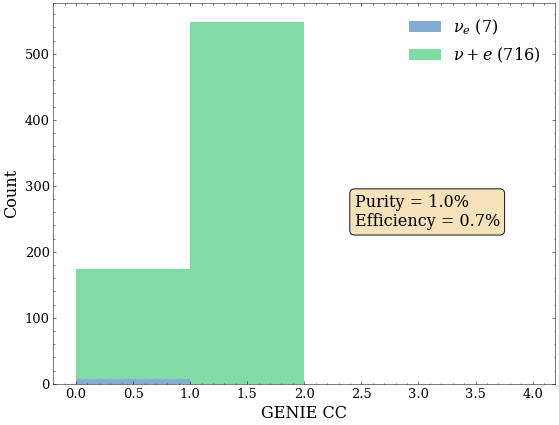

In [16]:

labels = [r'$\nu_e$',r'$\nu+e$']
CAFplotters.back_sig_hist([nue_mc_pot1,nuecc_mc_pot1],labels,f'{CAFpic.mcnuprefix}iscc',1000,xlabel='GENIE CC',bins=[0,1,2,3,4],alpha=0.5)

Text(0.5, 1.0, '')

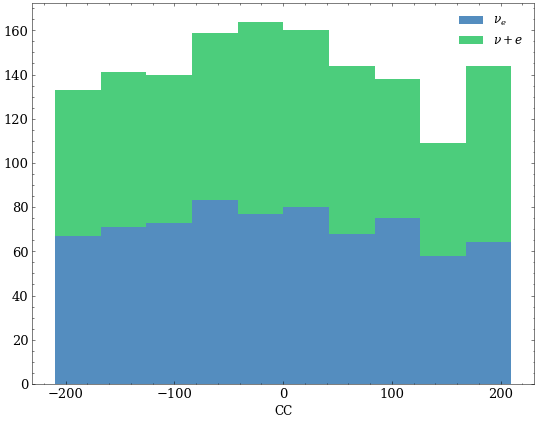

In [15]:
plt.figure(figsize=(9,7))
back = nuecc_mc_pot1.loc[:,f'rec.mc.nu.position.x'].values
sig = nuecc_mc_pot1.loc[:,f'rec.mc.nu.position.y'].values
plt.hist([back,sig],label=[r'$\nu_e$',r'$\nu+e$'],stacked=True,alpha=0.7,histtype='bar')
#plt.hist(sig,bins=2,label=r'$\nu+e$',stacked=True,alpha=0.5,histtype='bar')
plt.legend()
plt.xlabel('CC')
plt.title('')

Text(0.5, 1.0, '')

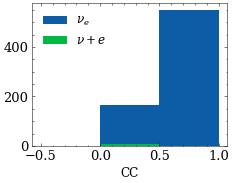

In [34]:
back = nuecc_mc_pot1.loc[:,f'{CAFpic.mcnuprefix}iscc'].values
sig = nue_mc_pot1.loc[:,f'{CAFpic.mcnuprefix}iscc'].values
plt.hist(back,bins=2,label=r'$\nu_e$',stacked=True)
plt.hist(sig,bins=2,label=r'$\nu+e$',stacked=True)
plt.legend()
plt.xlabel('CC')
plt.title('')